Kaili Hamilton
# **CAPSTONE 2 | MACHINE LEARNING PROJECT**

### **Question of Interest:**
Can I predict when to resale a sneaker in order to maximize the profit (sale price - retail price)?

In [69]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [70]:
df = pd.read_csv('StockX-Data-Contest-2019-3-Clean-Data.csv')
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit Margin,Colorway,Silhouette,Elapsed Time Days,Elapsed Time Weeks,Elapsed Time Years,Release Date Year,Release Date Month,Release Date Day,Order Date Year,Order Date Month,Order Date Day
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,2016-09-24,11.0,California,877,Beluga,V2,342,48.7,0.94,2016,9,24,2017,9,1
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,2016-11-23,11.0,California,465,Core-Black-Copper,V2,282,40.2,0.77,2016,11,23,2017,9,1
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,2016-11-23,11.0,California,470,Core-Black-Green,V2,282,40.2,0.77,2016,11,23,2017,9,1
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,2016-11-23,11.5,Kentucky,855,Core-Black-Red,V2,282,40.2,0.77,2016,11,23,2017,9,1
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2017-02-11,11.0,Rhode Island,608,Core-Black-Red-2017,V2,202,28.8,0.55,2017,2,11,2017,9,1


### **CLEAN THE DATA**

In [71]:
df.isna().sum() #no nulls

Order Date            0
Brand                 0
Sneaker Name          0
Sale Price            0
Retail Price          0
Release Date          0
Shoe Size             0
Buyer Region          0
Profit Margin         0
Colorway              0
Silhouette            0
Elapsed Time Days     0
Elapsed Time Weeks    0
Elapsed Time Years    0
Release Date Year     0
Release Date Month    0
Release Date Day      0
Order Date Year       0
Order Date Month      0
Order Date Day        0
dtype: int64

In [72]:
df.dtypes #need to take care of the string data types

Order Date             object
Brand                  object
Sneaker Name           object
Sale Price              int64
Retail Price            int64
Release Date           object
Shoe Size             float64
Buyer Region           object
Profit Margin           int64
Colorway               object
Silhouette             object
Elapsed Time Days       int64
Elapsed Time Weeks    float64
Elapsed Time Years    float64
Release Date Year       int64
Release Date Month      int64
Release Date Day        int64
Order Date Year         int64
Order Date Month        int64
Order Date Day          int64
dtype: object

## Note on 3/21
- Instead of dropping the order date and release date I am going to convert them to date time objects and see what that does to the model
- model didn't run, undoing the conversion

In [73]:
df.dtypes

Order Date             object
Brand                  object
Sneaker Name           object
Sale Price              int64
Retail Price            int64
Release Date           object
Shoe Size             float64
Buyer Region           object
Profit Margin           int64
Colorway               object
Silhouette             object
Elapsed Time Days       int64
Elapsed Time Weeks    float64
Elapsed Time Years    float64
Release Date Year       int64
Release Date Month      int64
Release Date Day        int64
Order Date Year         int64
Order Date Month        int64
Order Date Day          int64
dtype: object

In [74]:
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit Margin,Colorway,Silhouette,Elapsed Time Days,Elapsed Time Weeks,Elapsed Time Years,Release Date Year,Release Date Month,Release Date Day,Order Date Year,Order Date Month,Order Date Day
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,2016-09-24,11.0,California,877,Beluga,V2,342,48.7,0.94,2016,9,24,2017,9,1
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,2016-11-23,11.0,California,465,Core-Black-Copper,V2,282,40.2,0.77,2016,11,23,2017,9,1
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,2016-11-23,11.0,California,470,Core-Black-Green,V2,282,40.2,0.77,2016,11,23,2017,9,1
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,2016-11-23,11.5,Kentucky,855,Core-Black-Red,V2,282,40.2,0.77,2016,11,23,2017,9,1
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2017-02-11,11.0,Rhode Island,608,Core-Black-Red-2017,V2,202,28.8,0.55,2017,2,11,2017,9,1


#### Dropping Columns
- do I want to generzlize this beyond Yeezy and Off-White? Or do I want to keep to just these two designer brands?
- drop the strings/pandas objects columns
- keep `brand` but need to change it to 0=Yeezy and 1=Off-White
- is it necessary to keep `Profit Margin` since we have both `sale price` and `retail price`?

3/21/23
- only keeping Brand, Sale Price, Retail Price, Shoe Size, Profit Margin, Silhouette, 

In [75]:
df = df.drop(columns=['Colorway', 'Sneaker Name', 'Buyer Region', 'Order Date', 'Release Date', 'Elapsed Time Weeks', 'Elapsed Time Years', 'Release Date Year', 'Release Date Month', 'Release Date Day', 'Order Date Year', 'Order Date Month', 'Order Date Day'], axis=1)

In [76]:
df.head()

,Brand,Sale Price,Retail Price,Shoe Size,Profit Margin,Silhouette,Elapsed Time Days
0,Yeezy,1097,220,11.0,877,V2,342
1,Yeezy,685,220,11.0,465,V2,282
2,Yeezy,690,220,11.0,470,V2,282
3,Yeezy,1075,220,11.5,855,V2,282
4,Yeezy,828,220,11.0,608,V2,202


- There are 13 silhouettes. This seems reasonable to do label encoder on this 0-12 
- How will I know which value is assigned to which silhouette? Will it go in the order of the output from df.value_counts()?

In [77]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Brand'] = le.fit_transform(df['Brand'])
df.head()

,Brand,Sale Price,Retail Price,Shoe Size,Profit Margin,Silhouette,Elapsed Time Days
0,0,1097,220,11.0,877,V2,342
1,0,685,220,11.0,465,V2,282
2,0,690,220,11.0,470,V2,282
3,0,1075,220,11.5,855,V2,282
4,0,828,220,11.0,608,V2,202


In [78]:
print(le.classes_, le.transform(le.classes_))

[' Yeezy' 'Off-White'] [0 1]


It looks like V2 = 12. I can recognize this from the colorway, but how I will I know about the others? I assume it's alphabetical. So V1 = 11

In [79]:
df['Price Ratio'] = df['Sale Price'] / df['Retail Price']
df.head()

,Brand,Sale Price,Retail Price,Shoe Size,Profit Margin,Silhouette,Elapsed Time Days,Price Ratio
0,0,1097,220,11.0,877,V2,342,4.986364
1,0,685,220,11.0,465,V2,282,3.113636
2,0,690,220,11.0,470,V2,282,3.136364
3,0,1075,220,11.5,855,V2,282,4.886364
4,0,828,220,11.0,608,V2,202,3.763636


### **Fix Silhouette**

In [80]:
df = pd.concat([df, pd.get_dummies(df['Silhouette'])], axis=1).drop('Silhouette', axis=1)

In [81]:
df.head()

,Brand,Sale Price,Retail Price,Shoe Size,Profit Margin,Elapsed Time Days,Price Ratio,Air-Jordan-1-Retro-High,Nike-Air-Force-1-Low,Nike-Air-Force-1-Low-Virgil-Abloh,Nike-Air-Max-90,Nike-Air-Max-97,Nike-Air-Presto,Nike-Air-VaporMax,Nike-Blazer-Mid,Nike-React-Hyperdunk-2017-Flyknit,Nike-Zoom-Fly,Nike-Zoom-Fly-Mercurial,V1,V2
0,0,1097,220,11.0,877,342,4.986364,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,685,220,11.0,465,282,3.113636,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,690,220,11.0,470,282,3.136364,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,1075,220,11.5,855,282,4.886364,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,828,220,11.0,608,202,3.763636,0,0,0,0,0,0,0,0,0,0,0,0,1


#### Colorway
- I think that the color of the sneaker would have some influence on the price. However, not sure how to treat this column.
- there are 41 colorways
- however, some of them are "unknown" or "2018" or "AF100" - how are these to be treated?
- these are all off-white sneakers. 

### **TRAINING & TEST SETS**

In [82]:
df = sm.add_constant(df) 
#add a column to the dataset where the value is all 1's so the OLS Regression line doesn't have to pass through the origin

df.head()

,const,Brand,Sale Price,Retail Price,Shoe Size,Profit Margin,Elapsed Time Days,Price Ratio,Air-Jordan-1-Retro-High,Nike-Air-Force-1-Low,...,Nike-Air-Max-90,Nike-Air-Max-97,Nike-Air-Presto,Nike-Air-VaporMax,Nike-Blazer-Mid,Nike-React-Hyperdunk-2017-Flyknit,Nike-Zoom-Fly,Nike-Zoom-Fly-Mercurial,V1,V2
0,1.0,0,1097,220,11.0,877,342,4.986364,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.0,0,685,220,11.0,465,282,3.113636,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1.0,0,690,220,11.0,470,282,3.136364,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,0,1075,220,11.5,855,282,4.886364,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1.0,0,828,220,11.0,608,202,3.763636,0,0,...,0,0,0,0,0,0,0,0,0,1


In [83]:
X = df[['Brand', 'Shoe Size']]
#X = df.drop(['Price Ratio', 'const'], axis=1)
y = df['Price Ratio']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [84]:
lr = sm.OLS(y_train, X_train).fit()
lr.summary()

#looks like the datetime values didn't work. Tried dropping

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Price Ratio   R-squared (uncentered):                   0.807
Model:                            OLS   Adj. R-squared (uncentered):              0.807
Method:                 Least Squares   F-statistic:                          1.667e+05
Date:                Wed, 22 Mar 2023   Prob (F-statistic):                        0.00
Time:                        16:53:30   Log-Likelihood:                     -1.2735e+05
No. Observations:               79964   AIC:                                  2.547e+05
Df Residuals:                   79962   BIC:                                  2.547e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Brand          2.2396      0.009    238.842      0.000       2.221       2.258
Shoe Size      0.1649      0.001    320.777      0.000       0.164       0.166
==============================================================================
Omnibus:                    44117.392   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           766119.526
Skew:                           2.285   Prob(JB):                         0.00
Kurtosis:                      17.459   Cond. No.                         21.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---
---
---
# Hayden's Notes March 22, 2023
The first thing that I notice about your model is that is doesn't have a constant, meaning that the regression line is forced to pass through the origin. It is interesting that even so, the model has an R-squared value of 80%. When I added a constant in, the R-squared value actually went down. I'm not sure why this is...

In [85]:
lr2 = sm.OLS(y_train, sm.add_constant(X_train)).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Price Ratio   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Wed, 22 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:53:30   Log-Likelihood:            -1.2382e+05
No. Observations:               79964   AIC:                         2.476e+05
Df Residuals:                   79961   BIC:                         2.477e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4387      0.017     86.008      0.000       1.406       1.472
Brand          2.1776      0.009    241.960      0.000       2.160       2.195
Shoe Size      0.0217      0.002     12.518      0.000       0.018       0.025
==============================================================================
Omnibus:                    52146.485   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1178218.378
Skew:                           2.795   Prob(JB):                         0.00
Kurtosis:                      20.955   Cond. No.                         40.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
from statsmodels.tools.eval_measures import mse

# Let's look at the testing MSE of the first model (without a constant)
predicted = lr.predict(X_test)
print("MSE without a constant: ", mse(predicted, y_test))

# Then, let's look at the testing MSE of the second model (with constant)
predicted = lr2.predict(sm.add_constant(X_test))
print("MSE with constant: ", mse(predicted, y_test))

MSE without a constant:  1.4847887763928347
MSE with constant:  1.372308760099916


## About the MSE
Looking at the code above, we can see that even though the R-squared value was lower for the model without a constant, the model actually tests better when it has a constant (it had a lower MSE). That is a good indication that we should add a constant to the model.

The MSE of 1.37 means that on average, predicted values tend to be about 1.37 away from their true values after being squared. We can also look at the true error values for each individual row. Remember that `Price Ratio`, which is the new column that you created, is essentially a percentage that says how much of the retail price that the shoe actually sold for. The `Error` can be interpreted as meaning "the difference in predicted percentage of retail price that the shoe sold for from the actual percentage of retail price". 

The Root Mean Squared Error is 1.17, meaning that on average, each data point has an error of about 1.17. Since the dependent variable is Price Ratio, that means that on average, predicted values tend to error when predicting the price ratio by about 117%. An error of 1.17, for example, would mean that the model tended to predict, on average, each sale price with an error of 1.17. So if the retail price was 100, and the actual sale price was 200 (price ratio of 2), your model would have predicted a price ratio of 3.17, or 317 dollars, either above or below the actual value.

It's up to you to decide, as the buyer/seller, if that is a good accuracy for you. You could buy some shoes for 100, and then the range of predicted selling prices would range from -1.17 times the actual sale price (80% of the retail price, or 80 dollars) or up to 1.17 times the actual sale price (317 dollars) reliably. That's a big confidence interval, and it doesn't seem to provide much certainty. I'm just making up an example, by the way.

One thing that is **super** interesting to me is the coefficient for Brand, which is 2.177. This means that for whichever shoe brand is a 1 (Nike, I assume), just simply being the brand Nike will increase the profit ratio of the shoe by 217%. So, Nikes are, in general, the more profitable shoe to buy and resell.

Shoe size doesn't seem to tell us anything, as far as I can tell here.

In [87]:
MSE_df = X_test.copy()
MSE_df['Actual Value'] = y_test
MSE_df['Predicted Value'] = predicted
MSE_df['Error'] = MSE_df['Actual Value'] - MSE_df['Predicted Value']
MSE_df.head()

,Brand,Shoe Size,Actual Value,Predicted Value,Error
96954,1,11.0,2.352941,3.855396,-1.502455
87819,1,10.0,4.184615,3.833665,0.350951
95584,1,4.0,1.400000,3.703279,-2.303279
50629,0,10.0,1.318182,1.656053,-0.337872
35760,0,5.5,1.240909,1.558264,-0.317355


In [88]:
np.sqrt(mse(predicted, y_test))

1.1714558293422404

These are just some graphs that I made

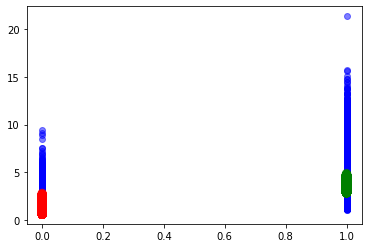

In [89]:
plt.scatter(X_test['Brand'], y_test, c='blue', alpha=.5)
predicted = lr.predict(X_test)
plt.scatter(X_test['Brand'], predicted, c=np.where(X_test['Brand'] == 0,'red','green'), alpha=.7, s=70)

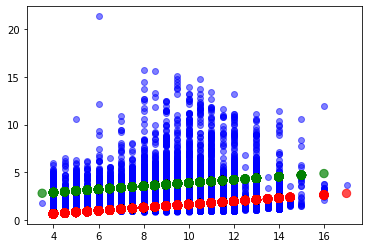

In [90]:
plt.scatter(X_test['Shoe Size'], y_test, c='blue', alpha=.5)
predicted = lr.predict(X_test)
plt.scatter(X_test['Shoe Size'], predicted, c=np.where(X_test['Brand']==0,'red','green'), alpha=.7, s=70)

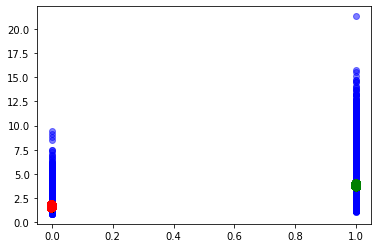

In [91]:
plt.scatter(X_test['Brand'], y_test, c='blue', alpha=.5)
predicted = lr2.predict(sm.add_constant(X_test))
plt.scatter(X_test['Brand'], predicted, c=np.where(X_test['Brand'] == 0,'red','green'), alpha=.7, s=70)

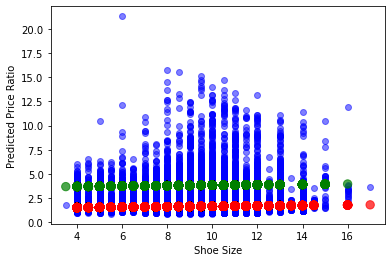

In [97]:
plt.scatter(X_test['Shoe Size'], y_test, c='blue', alpha=.5)
predicted = lr2.predict(sm.add_constant(X_test))
plt.scatter(X_test['Shoe Size'], predicted, c=np.where(X_test['Brand']==0,'red','green'), alpha=.7, s=70)
plt.xlabel('Shoe Size')
plt.ylabel('Predicted Price Ratio')
plt.show()

## How to get the regression line written out
Let's look at how to get the coefficients written out. This will essentially become a long formatted string.

The `.params` attribute is a Series with the coefficients and the feature names.

In [99]:
lr2.params

const        1.438744
Brand        2.177612
Shoe Size    0.021731
dtype: float64

In [112]:
equation = f"PriceRatio = {round(lr2.params['Brand'],2)}*Brand + {round(lr2.params['Shoe Size'],2)}*ShoeSize + {round(lr2.params['const'],2)}"
equation

'PriceRatio = 2.18*Brand + 0.02*ShoeSize + 1.44'

## How to plot
One way that you can plot this graph is in 3 dimensions. Lucky you only have 3. If you run the file `3d_graph.py` included in the zip folder, you can see the output of the 3 dimensional graph. The red points are the actual data points and the blue square that you see is the regression line. Doesn't look very pretty but it works.

The other way to plot a three dimensional graph is by visualizing a single variable at a time. That's going to be the closest thing to what you want.

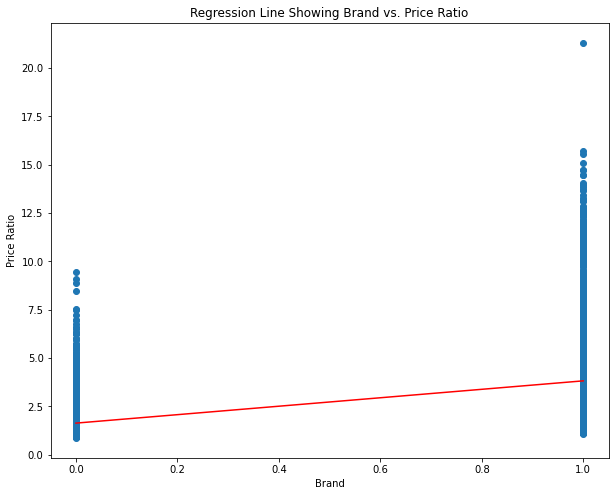

In [138]:
lr = sm.OLS(y_train, sm.add_constant(X_train[['Brand']])).fit()
predicted = lr.predict(X_test)
plt.figure(figsize=(10, 8))
plt.scatter(X_test['Brand'], y_test)

brands = np.linspace(0, 1, 1001)
predicted = lr.predict(sm.add_constant(brands))

plt.plot(brands, predicted, c='red')
plt.title('Regression Line Showing Brand vs. Price Ratio')
plt.xlabel('Brand')
plt.ylabel('Price Ratio')
plt.show()

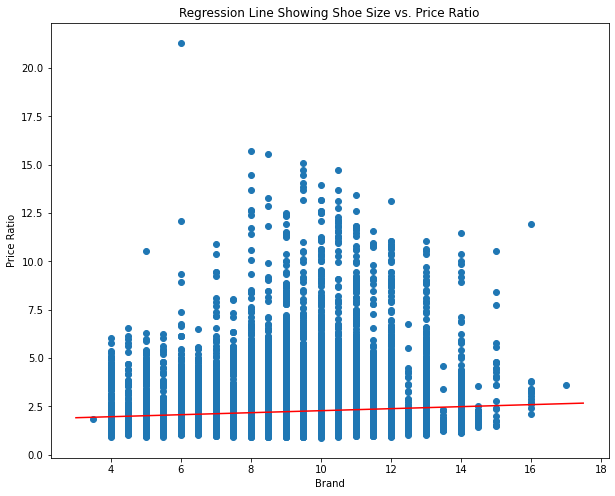

In [142]:
lr = sm.OLS(y_train, sm.add_constant(X_train[['Shoe Size']])).fit()
predicted = lr.predict(X_test)
plt.figure(figsize=(10, 8))
plt.scatter(X_test['Shoe Size'], y_test)

sizes = np.linspace(3, 17.5, 1001)
predicted = lr.predict(sm.add_constant(sizes))

plt.plot(sizes, predicted, c='red')
plt.title('Regression Line Showing Shoe Size vs. Price Ratio')
plt.xlabel('Brand')
plt.ylabel('Price Ratio')
plt.show()

---
---
---

In [152]:
predicted = lr.predict(X_test)

In [153]:
from sklearn.metrics import mean_squared_error
mean_squared_error(predicted, y_test)

1.4847887763928342

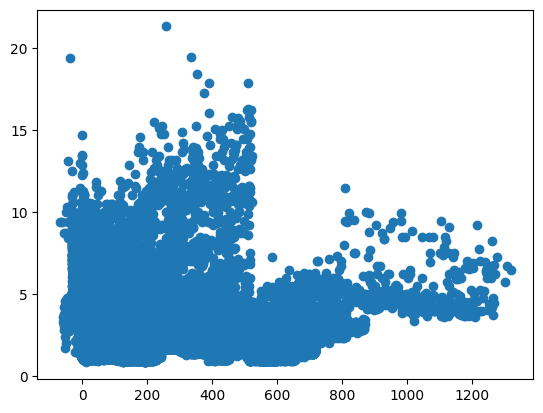

In [156]:
plt.scatter(df['Elapsed Time Days'], df['Price Ratio'])

## **YEEZY ONLY**

In [184]:
filt = df['Brand'] == 0
df_yzy = df[filt]
df_yzy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72162 entries, 0 to 72161
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   const                              72162 non-null  float64
 1   Brand                              72162 non-null  int32  
 2   Sale Price                         72162 non-null  int64  
 3   Retail Price                       72162 non-null  int64  
 4   Shoe Size                          72162 non-null  float64
 5   Profit Margin                      72162 non-null  int64  
 6   Elapsed Time Days                  72162 non-null  int64  
 7   Price Ratio                        72162 non-null  float64
 8   Air-Jordan-1-Retro-High            72162 non-null  uint8  
 9   Nike-Air-Force-1-Low               72162 non-null  uint8  
 10  Nike-Air-Force-1-Low-Virgil-Abloh  72162 non-null  uint8  
 11  Nike-Air-Max-90                    72162 non-null  uin

In [193]:
X = df_yzy[['Shoe Size']]
#X = df_yzy.drop(['Price Ratio', 'const'], axis=1)
y = df_yzy['Price Ratio']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [194]:
lr = sm.OLS(y_train, X_train).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Price Ratio   R-squared (uncentered):                   0.815
Model:                            OLS   Adj. R-squared (uncentered):              0.815
Method:                 Least Squares   F-statistic:                          2.536e+05
Date:                Tue, 21 Mar 2023   Prob (F-statistic):                        0.00
Time:                        18:30:12   Log-Likelihood:                         -66257.
No. Observations:               57729   AIC:                                  1.325e+05
Df Residuals:                   57728   BIC:                                  1.325e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Shoe Size      0.1676      0.000    503.598      0.000       0.167       0.168
==============================================================================
Omnibus:                    25148.028   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           203217.351
Skew:                           1.909   Prob(JB):                         0.00
Kurtosis:                      11.361   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## NOTES
- definitely looks like shoe size is the biggest influencer on price ratio

## **Off-White Only**

In [195]:
filt = df['Brand'] == 1
df_off = df[filt]
df_off.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27794 entries, 72162 to 99955
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   const                              27794 non-null  float64
 1   Brand                              27794 non-null  int32  
 2   Sale Price                         27794 non-null  int64  
 3   Retail Price                       27794 non-null  int64  
 4   Shoe Size                          27794 non-null  float64
 5   Profit Margin                      27794 non-null  int64  
 6   Elapsed Time Days                  27794 non-null  int64  
 7   Price Ratio                        27794 non-null  float64
 8   Air-Jordan-1-Retro-High            27794 non-null  uint8  
 9   Nike-Air-Force-1-Low               27794 non-null  uint8  
 10  Nike-Air-Force-1-Low-Virgil-Abloh  27794 non-null  uint8  
 11  Nike-Air-Max-90                    27794 non-null 

In [198]:
X = df_off[['Shoe Size', 'Elapsed Time Days']]
#X = df_off.drop(['Price Ratio', 'const'], axis=1)
y = df_off['Price Ratio']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [199]:
lr = sm.OLS(y_train, X_train).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Price Ratio   R-squared (uncentered):                   0.797
Model:                            OLS   Adj. R-squared (uncentered):              0.797
Method:                 Least Squares   F-statistic:                          4.363e+04
Date:                Tue, 21 Mar 2023   Prob (F-statistic):                        0.00
Time:                        18:32:49   Log-Likelihood:                         -46055.
No. Observations:               22235   AIC:                                  9.211e+04
Df Residuals:                   22233   BIC:                                  9.213e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Shoe Size             0.3343      0.002    211.619      0.000       0.331       0.337
Elapsed Time Days     0.0077      0.000     51.607      0.000       0.007       0.008
==============================================================================
Omnibus:                     4018.398   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10064.542
Skew:                           1.004   Prob(JB):                         0.00
Kurtosis:                       5.614   Cond. No.                         12.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **KAILI'S NOTES & QUESTIONS**

- do I want to generzlize this beyond Yeezy and Off-White? Or do I want to keep to just these two designer brands? I will need to keep or delete the Silhouette, and perhaps the colorway...?
- decided to keep the silhouette to build the model
- dropped the colorway column, at least for now. not sure how to treat it. See notes above.
- the model ran, but not quite sure how to interpret the results.
- what is the equation of the regression line?
- how to do a scatterplot with the OLS regression line?
- what do I do next in order to answer my question